## Introduction to Machine Learning: Supervised Learning Final
### University of Colorado Boulder

#### Final Project
This notebook contains code, visualizations, and descriptions of a supervised learning solution. The problem description, EDA procedure, model analysis (including building and training), model results, and discussion/conclusion are included in individual sections of the notebook.

## Problem Description

We desire to determine whether an individual is likely to have "higher levels of Subclinical Narcissism," which is associated with a score greater than 20 points on the Narcisitic Personality Inventory (NPI) 40 question survey [1]. We train a model to predict whether the individual will score above or below 20 points with a minimal set of answers to the 40 questions. The data used to train a model is obtained from Kaggle.com [2].


[1] https://www.researchgate.net/publication/281462267_A_Study_on_Sub-Clinical_Narcissistic_Personality_Score_and_Its_Relationship_with_Academic_Performance-An_Indian_Experience
[2] https://www.kaggle.com/datasets/lucasgreenwell/narcissistic-personality-inventory-responses 

## EDA Procedure

In [2]:
# Load Libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Load Data
data = pd.read_csv("data.csv")
data.head()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,50
1,6,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,40
2,27,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,28
3,29,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,1,1,230,1,37
4,6,1,2,1,1,1,2,1,2,1,...,2,1,2,2,2,0,1,389,1,50


### Clean Data

In [4]:
# Drop all rows that are missing answers to questions
# Valid answers are 1 and 2
question_cols = [col for col in data.columns if col.startswith("Q")]
for col in question_cols:
    data.drop(data[data[col] == 0].index, axis=0, inplace=True)

In [5]:
# Drop rows with age < 14 or >= 100
# Ages >= 100 are likely typos and ages < 14 should have been pruned already
data.drop(data[data["age"] < 14].index, axis=0, inplace=True)
data.drop(data[data["age"] >= 100].index, axis=0, inplace=True)

In [6]:
# Remove sum column as it is not needed for analysis
if "sum" in data.columns:
    data.drop("sum", axis=1, inplace=True)

In [7]:
# Add a subclincal narcissism column where True indicates higher likelihood or score > 20
data["subclinical_narcissism"] = data["score"] > 20

In [8]:
# Reset indices
data.reset_index(inplace=True, drop=True)

# Review summary of data
data.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,10393.000000,10393.000000,10393.000000,10393.000000,10393.000000,10393.000000,10393.000000,10393.000000,10393.000000,10393.000000,...,10393.000000,10393.000000,10393.000000,10393.000000,10393.000000,10393.000000,10393.000000,1.039300e+04,10393.000000,10393.000000
mean,13.355624,1.387184,1.787549,1.831040,1.177716,1.427307,1.631387,1.306456,1.414510,1.462715,...,1.671798,1.265178,1.811989,1.694313,1.852786,1.612431,1.417781,1.292995e+05,1.426633,33.720196
std,8.515505,0.487130,0.409062,0.374735,0.382292,0.494711,0.482452,0.461044,0.492661,0.498632,...,0.469581,0.441449,0.390740,0.460720,0.354337,0.487219,0.493217,1.313287e+07,0.503673,13.630448
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.400000e+01,0.000000,14.000000
25%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.050000e+02,1.000000,23.000000
50%,12.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.580000e+02,1.000000,30.000000
75%,18.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.410000e+02,2.000000,43.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.338845e+09,3.000000,86.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10393 entries, 0 to 10392
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   score                   10393 non-null  int64
 1   Q1                      10393 non-null  int64
 2   Q2                      10393 non-null  int64
 3   Q3                      10393 non-null  int64
 4   Q4                      10393 non-null  int64
 5   Q5                      10393 non-null  int64
 6   Q6                      10393 non-null  int64
 7   Q7                      10393 non-null  int64
 8   Q8                      10393 non-null  int64
 9   Q9                      10393 non-null  int64
 10  Q10                     10393 non-null  int64
 11  Q11                     10393 non-null  int64
 12  Q12                     10393 non-null  int64
 13  Q13                     10393 non-null  int64
 14  Q14                     10393 non-null  int64
 15  Q15                

Text(0.5, 1.0, 'Correlation Matrix of NPI Survey Results')

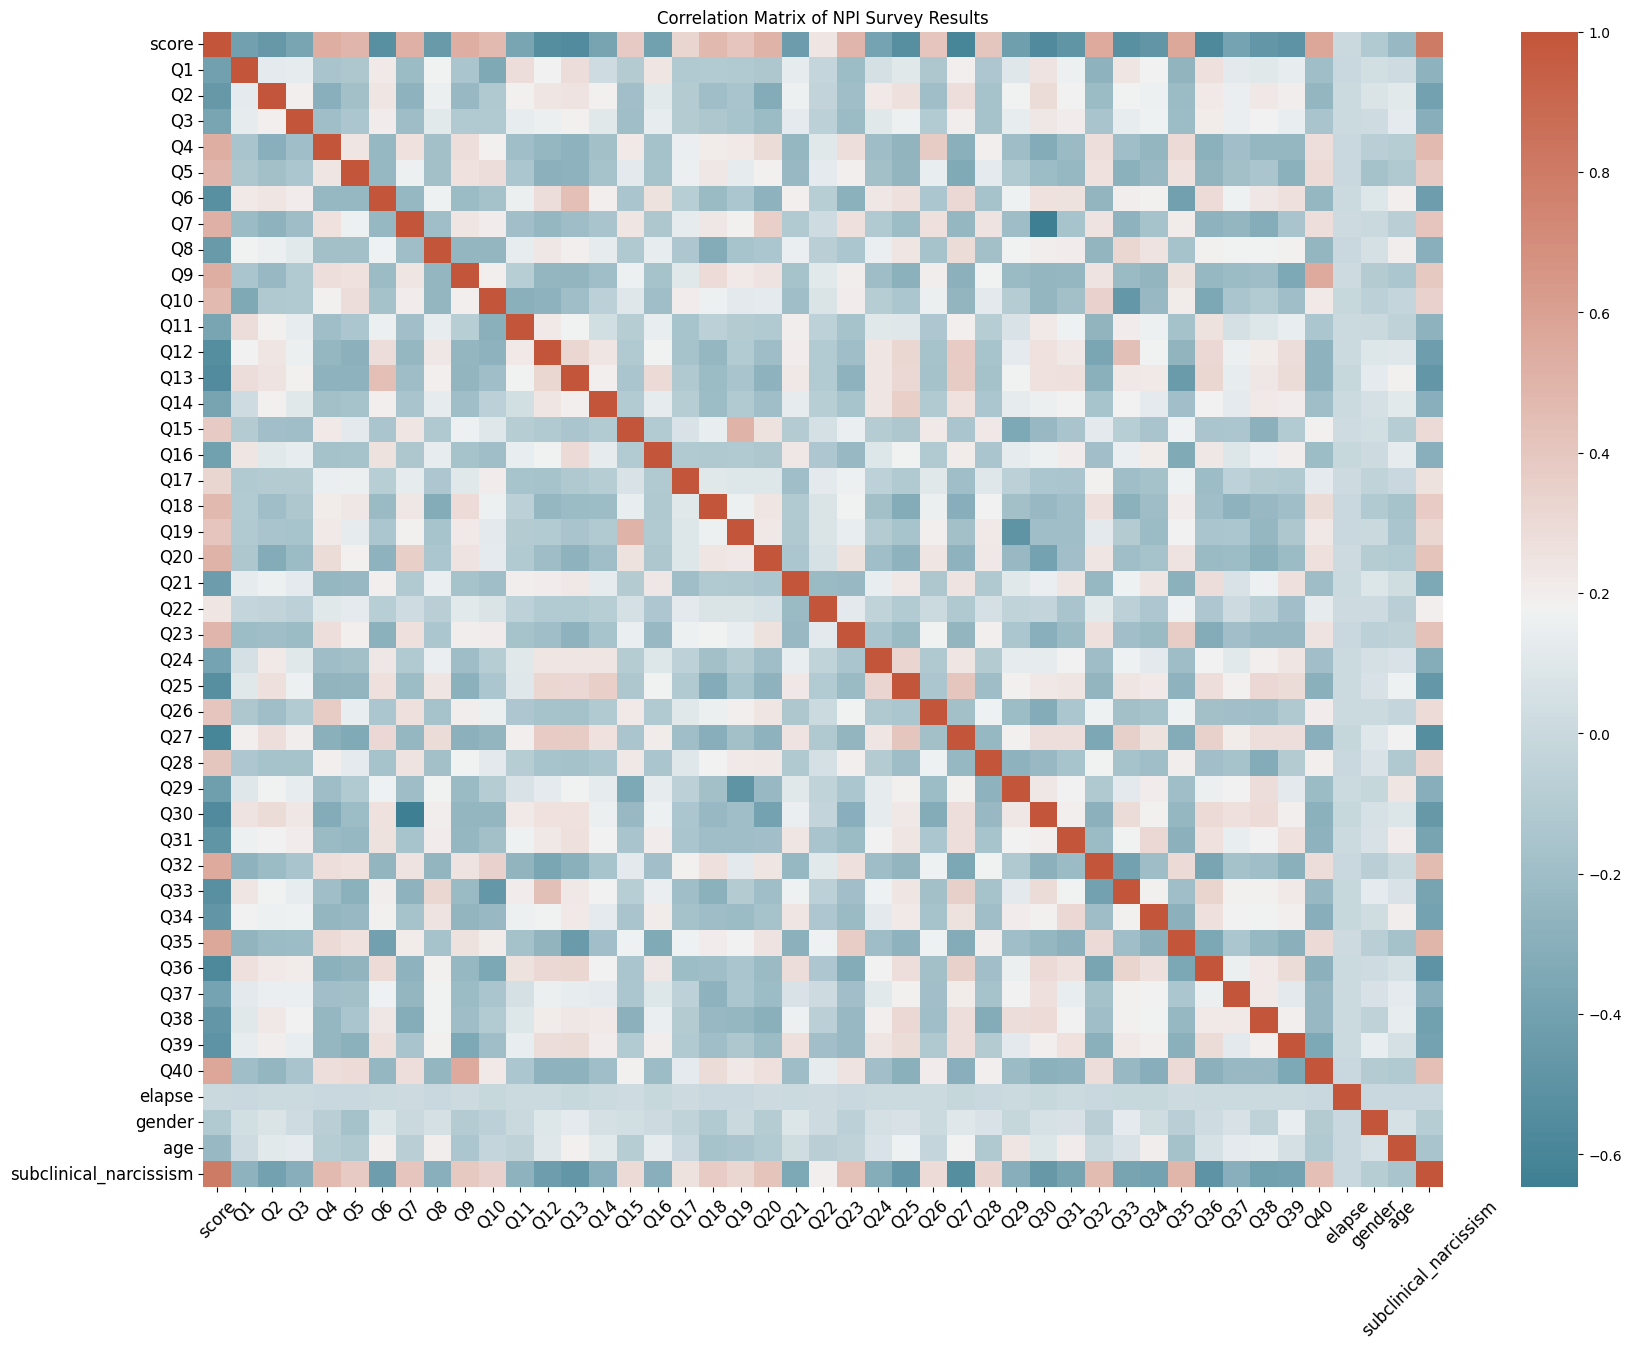

In [10]:
# Evaluate Correlation of Features
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True))
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.set_title("Correlation Matrix of NPI Survey Results", fontsize=12)

In [11]:
# As age, gender, and time elapse have close to zero correlation to all questions and score,
# we will not use those columns in our evaluation
# We also won't use score, as all 40 questions are needed to calculate score
if "elapse" in data.columns:
    data.drop("elapse", axis=1, inplace=True)
if "age" in data.columns:
    data.drop("age", axis=1, inplace=True)
if "gender" in data.columns:
    data.drop("gender", axis=1, inplace=True)
if "score" in data.columns:
    data.drop("score", axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix of NPI Survey Results')

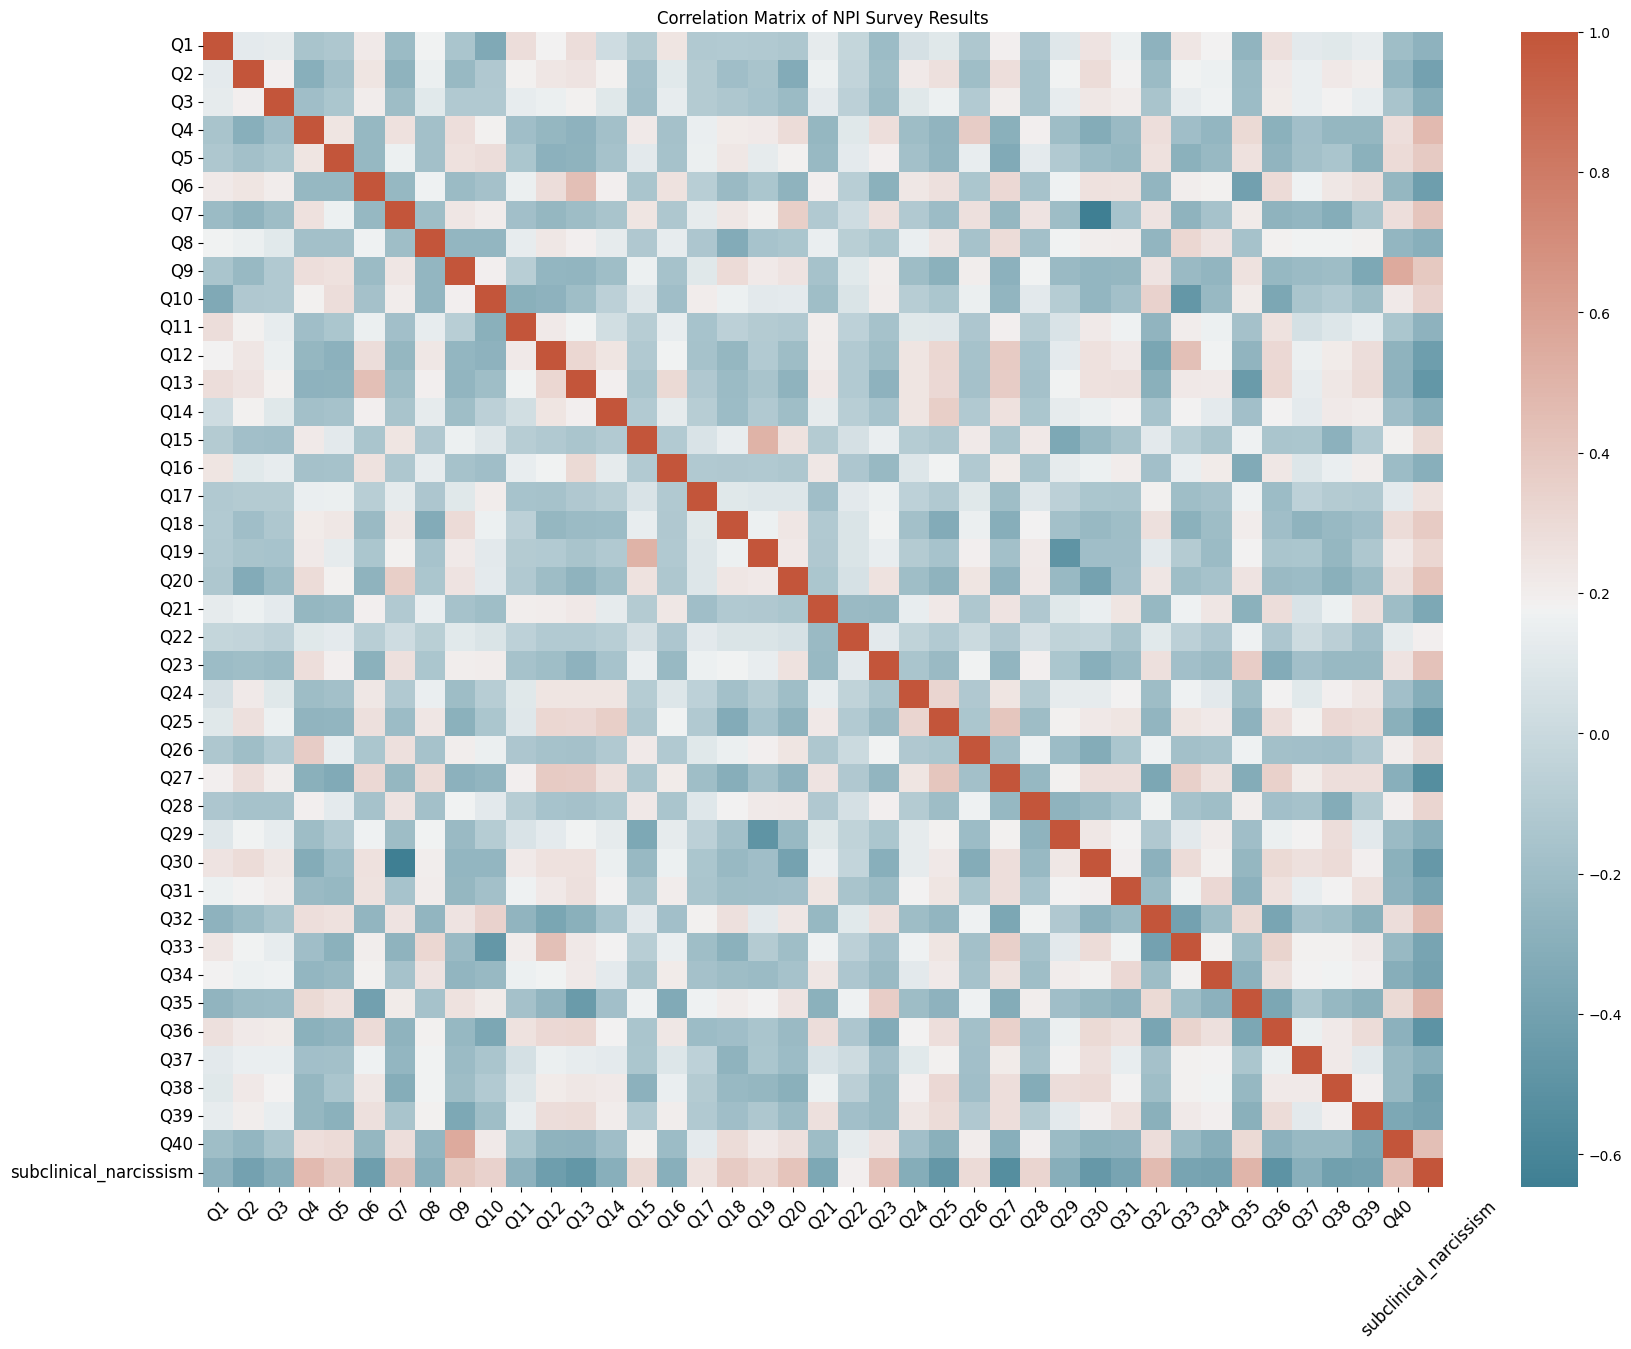

In [12]:
# Evaluate Correlation of Features
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True))
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.set_title("Correlation Matrix of NPI Survey Results", fontsize=12)

## Model Analysis

In [13]:
# Load Libraries for Model Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [14]:
# Prepare data for training and testing
train, test = train_test_split(data, test_size=0.33)
y_label = "subclinical_narcissism"
X_train = train.loc[:, train.columns != y_label]
y_train = train[y_label]
X_test = test.loc[:, test.columns != y_label]
y_test = test[y_label]

In [15]:
def evaluate_accuracy(model, X, y, show=False):
    # Evaluate the accuracy of the model with the test data
    yhat_test = model.predict(X)
    cm = confusion_matrix(y, yhat_test)
    accuracy = accuracy_score(y, yhat_test)
    precision = precision_score(y, yhat_test)
    recall = recall_score(y, yhat_test)
    f1 = f1_score(y, yhat_test)

    # Display model evaluation metrics
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(values_format="d", cmap="GnBu")
    if show:
        plt.show()
        print(f"Binary Accuracy of model: {accuracy}")
        print(f"Precision of model: {precision}")
        print(f"Recall of model: {recall}")
        print(f"F1 of model: {f1}")
    plt.close()
    return accuracy, precision, recall, f1

### First Model: Logistic Regression for Binary Classification with all Features Available

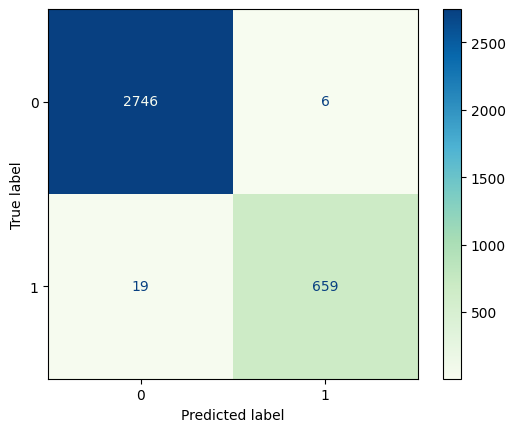

Binary Accuracy of model: 0.9927113702623906
Precision of model: 0.9909774436090225
Recall of model: 0.971976401179941
F1 of model: 0.9813849590469099


In [16]:
# Instantiate a simple LogisticRegression Model
LogReg = LogisticRegression(solver="liblinear")

# Fit the model to the training data
LogReg.fit(X_train, y_train)

accuracy, precision, recall, f1 = evaluate_accuracy(LogReg, X_test, y_test, show=True)

In [17]:
print(
    "The Logistic Regression model is highly accurate with access to all features (questions from the survey)."
)
print(
    "The goal of this analysis is to determine the minimum set of questions to obtain a highly accurate model for"
)
print(
    f"predicting whether an individual is likely to exhibit subclinical narcissism. With an F1 score of {f1} with all questions,"
)
print(
    "we will determine the minimum feature set needed to obtain a model with an F1 score of > 0.9."
)

The Logistic Regression model is highly accurate with access to all features (questions from the survey).
The goal of this analysis is to determine the minimum set of questions to obtain a highly accurate model for
predicting whether an individual is likely to exhibit subclinical narcissism. With an F1 score of 0.9813849590469099 with all questions,
we will determine the minimum feature set needed to obtain a model with an F1 score of > 0.9.


### Feature Selection

In [18]:
feature_set = X_train.columns
best_f1 = {40: f1}
# Iterate through the number of possible features, dropping one feature each iteration until F1 drops below 0.9.
for i in range(39, 1, -1):
    best_f1[i] = 0
    print("=======================================")
    print(f"Working on feature sets of size {i}")
    print("=======================================")
    drop_feature = None
    for feature in feature_set:
        #  Instantiate a simple LogisticRegression Model
        LogReg = LogisticRegression(solver="liblinear")

        # Fit the model to the training data
        LogReg.fit(X_train[list(feature_set.drop(feature))], y_train)

        # Evaluate F1 score
        accuracy, precision, recall, f1 = evaluate_accuracy(
            LogReg, X_test[list(feature_set.drop(feature))], y_test
        )
        if f1 > best_f1[i]:
            best_f1[i] = f1
            drop_feature = feature

    # If F1 drops below 0.9, break
    if best_f1[i] < 0.9:
        break
    # If a feature was selected to be dropped, drop the feature and continue
    elif drop_feature:
        feature_set = feature_set.drop(drop_feature)
    else:
        break
    print(f"F1 Score = {best_f1[i]}")
    print(f"Feature Set = {feature_set}")

Working on feature sets of size 39
F1 Score = 0.9777448071216618
Feature Set = Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q39', 'Q40'],
      dtype='object')
Working on feature sets of size 38
F1 Score = 0.973254086181278
Feature Set = Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q11', 'Q12',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22',
       'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32',
       'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q39', 'Q40'],
      dtype='object')
Working on feature sets of size 37
F1 Score = 0.9724907063197026
Feature Set = Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q9', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q

Text(0, 0.5, 'F1 Score')

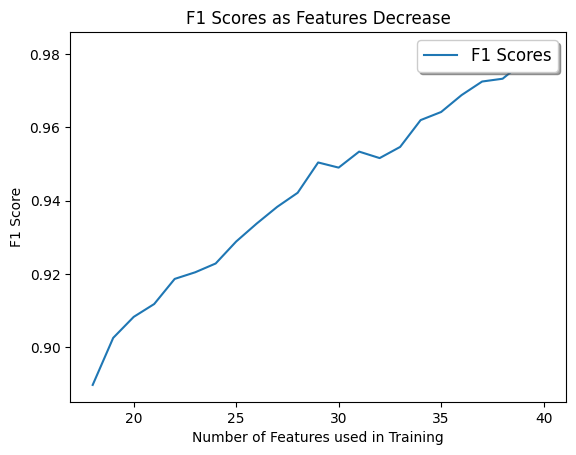

In [19]:
fig, ax = plt.subplots()
l1 = ax.plot(best_f1.keys(), best_f1.values(), label="F1 Scores")
legend = ax.legend(loc="upper right", shadow=True, fontsize="large")
ax.set_title("F1 Scores as Features Decrease")
ax.set_xlabel("Number of Features used in Training")
ax.set_ylabel("F1 Score")

## Final Model Results

In [20]:
print(f"Features used to train final model: {feature_set}")

Features used to train final model: Index(['Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q11', 'Q13', 'Q14', 'Q15', 'Q18', 'Q22',
       'Q24', 'Q27', 'Q29', 'Q32', 'Q34', 'Q35', 'Q36', 'Q37'],
      dtype='object')


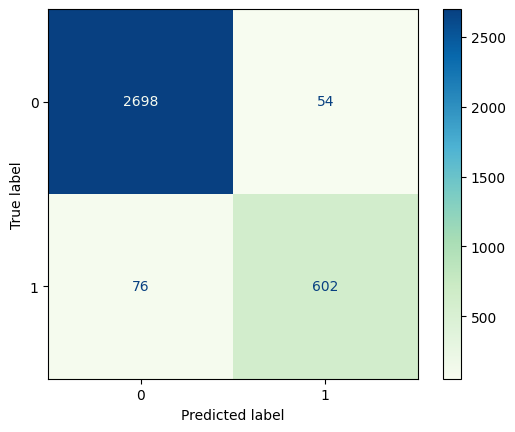

Binary Accuracy of model: 0.9620991253644315
Precision of model: 0.9176829268292683
Recall of model: 0.887905604719764
F1 of model: 0.9025487256371814


In [21]:
# Instantiate a simple LogisticRegression Model
final_model = LogisticRegression(solver="liblinear")

# Fit the model to the training data
final_model.fit(X_train[feature_set], y_train)

# Get Accuracy Metrics and Confusion Matrix
accuracy, precision, recall, f1 = evaluate_accuracy(
    final_model, X_test[feature_set], y_test, show=True
)

The final model has an F1 score > 0.9. This model predicts whether or not a person will score higher than 20 on the NPI-40 based on a subset of the 40 questions.

## Discussion/Conclusion

If an individual wishes to determine whether they are more likely to show signs of Subclinical Narcissism without answering all 40 questions of the NPI-40 survey, they can answer a subset of the questions and use the final prediction model. 

In [23]:
print(f"The questions that are used in the prediction model are: {feature_set}")

The questions that are used in the prediction model are: Index(['Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q11', 'Q13', 'Q14', 'Q15', 'Q18', 'Q22',
       'Q24', 'Q27', 'Q29', 'Q32', 'Q34', 'Q35', 'Q36', 'Q37'],
      dtype='object')


We downselected the questions/features to use in a predictive model based on the maximum F1 score when removing one feature/question at a time from the training set. 

Similar techniques to those shown in this notebook can be used to perform binary classification based on a subset of features of a dataset.